# Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/yn/Desktop/Yuvi/DataTrained/EvaluationProjects/Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.shape

(7043, 21)

We have 7043 rows and 21 columns in our dataset.

## Exploratory Data Analysis

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We do not have any missing values in the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We have 3 numeric type features and 18 object type features.

Lets drop customerID column as its nominal feature and not going to help us to find any trend.

In [8]:
df.drop(['customerID'],axis=1,inplace=True)

In [9]:
check_feature_values=df.drop(['MonthlyCharges'],axis=1)
for col in check_feature_values:
    print(col)
    print("=====================================")
    print(df[col].value_counts(),'\n')

gender
Male      3555
Female    3488
Name: gender, dtype: int64 

SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64 

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64 

PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [10]:
print((df['TotalCharges']==' ').sum())

11


We 11 empty data for the feature TotalCharges

Lets fill the missing value with mean value.

In [11]:
(df['TotalCharges']==0).sum()

0

In [12]:
df['TotalCharges']=df['TotalCharges'].replace({' ':0})

In [13]:
(df['TotalCharges']==0).sum()

11

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
df['TotalCharges']=SimpleImputer(missing_values=0,strategy='mean').fit_transform(df[['TotalCharges']])

In [16]:
print((df['TotalCharges']==0).sum())
print((df['TotalCharges']==' ').sum())

0
0


In [17]:
df['TotalCharges']=df['TotalCharges'].astype(float)

## Data Visualization

#### Univariate Analysis

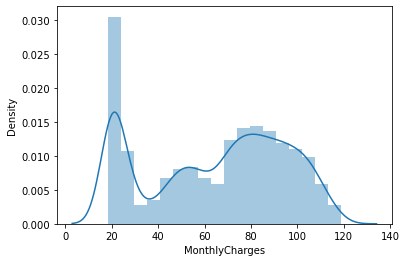

In [18]:
sns.distplot(df['MonthlyCharges'])
plt.show()

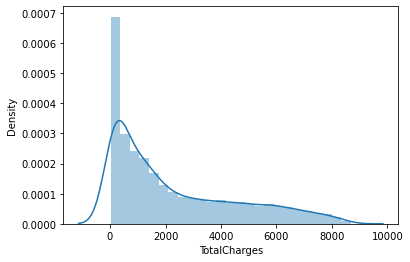

In [19]:
sns.distplot(df['TotalCharges'])
plt.show()

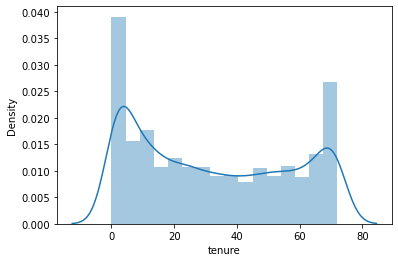

In [20]:
sns.distplot(df['tenure'])
plt.show()

From the above plots we can see that all the features are not normally distributed.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [22]:
catg_features=[]
for col in df.columns:
    if(df[col].dtype=='object'):
        catg_features.append(col)
print(catg_features)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [23]:
catg_features.append('SeniorCitizen')

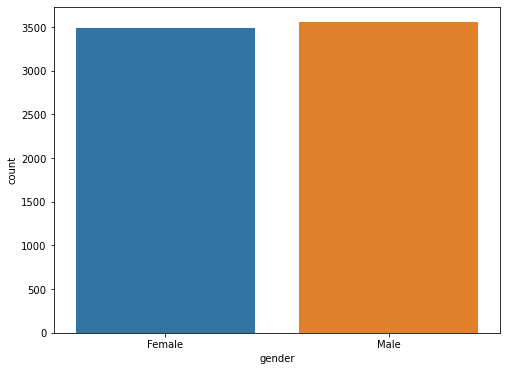

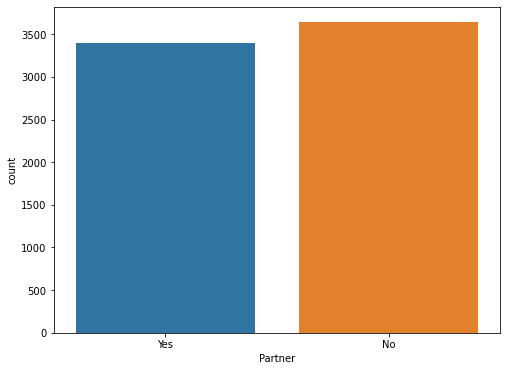

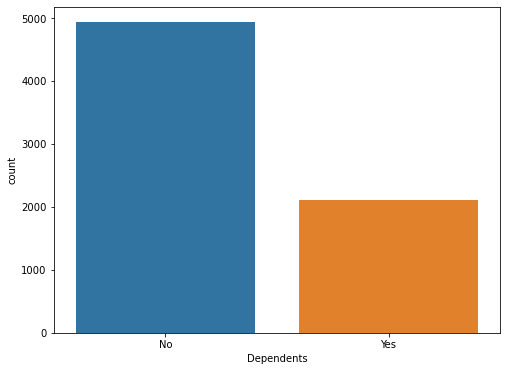

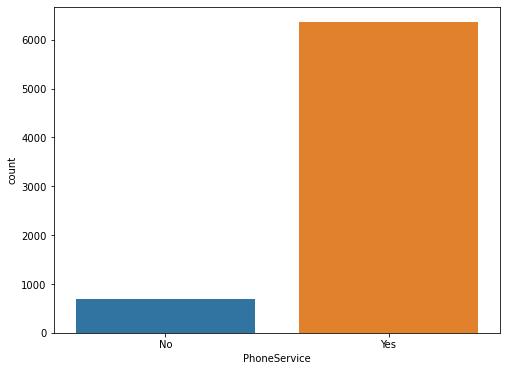

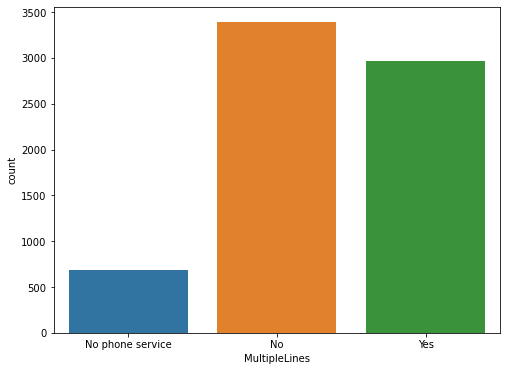

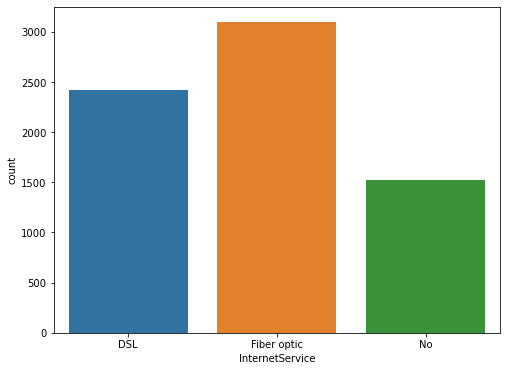

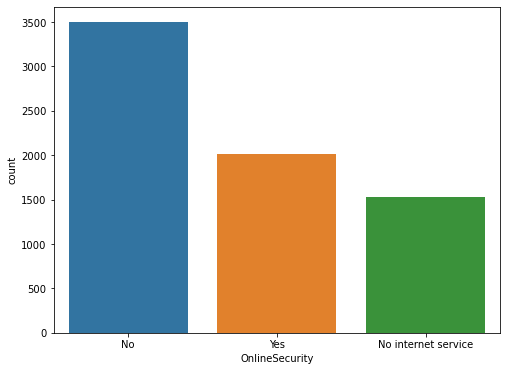

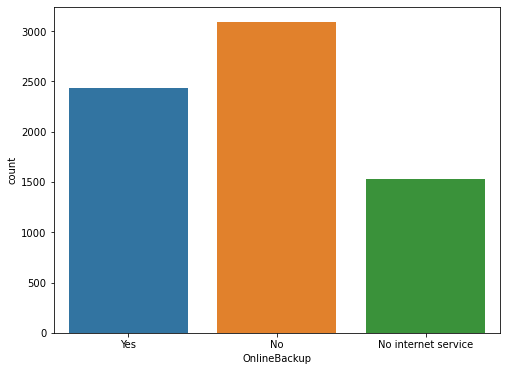

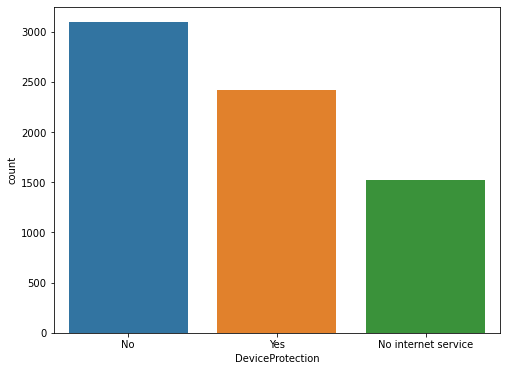

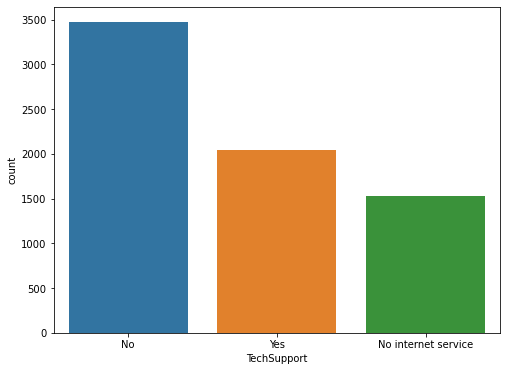

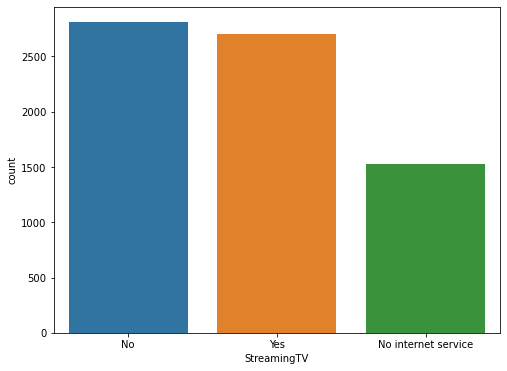

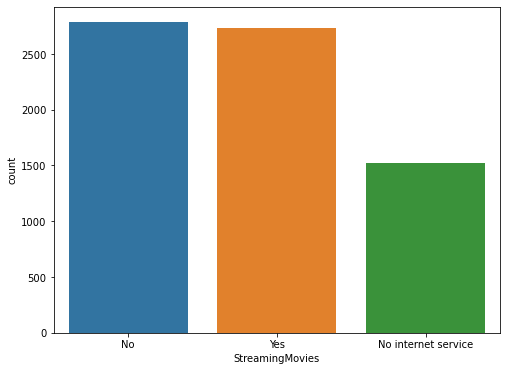

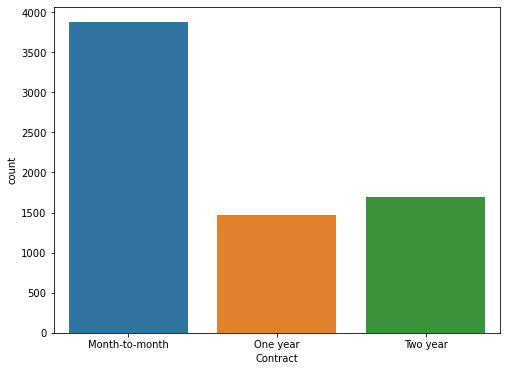

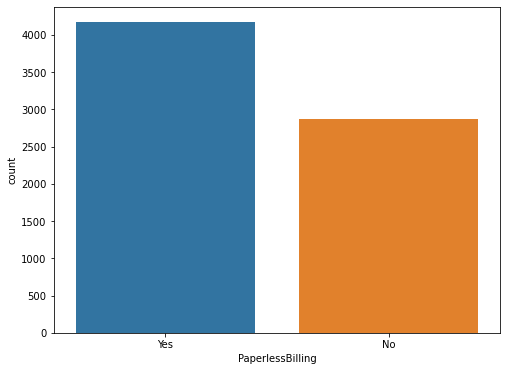

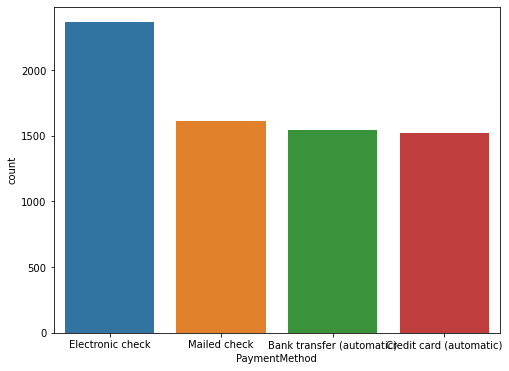

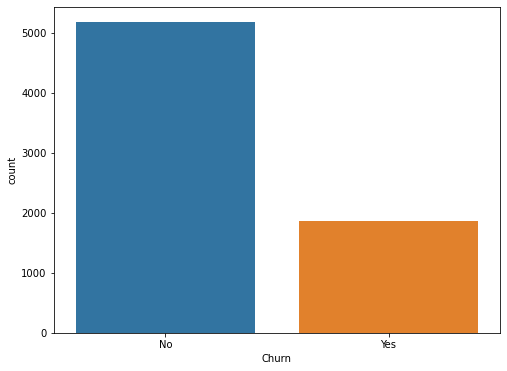

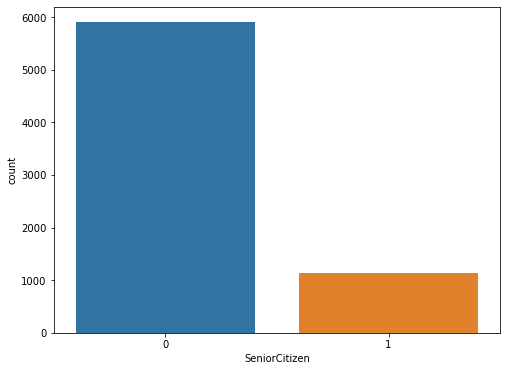

In [24]:
for col in catg_features:
    plt.figure(figsize=(8,6))
    sns.countplot(df[col])
    plt.show()

Observations from above plots:
1. We have more or less same number of male and female customers in our dataset.
2. We have more customers with no dependents.
3. Majority of the customers are having the phone service.
4. Mojority of the customers does not have multiple lines.
5. Fiber Optic Internet service is use by more number of customers and followed by DSL.we have less customer with no internet services.
6. Most of the customers does not subscribed to security service.
7. Majority of the customers does not subscribed to Online Backup service.
8. Most of the customers does not subscribe to DeviceProtection service from the company.
9. Most of the customers does not subscribe to additional TechSupport service from the company.
10. We have almost more or less equal no of customers who use internet to watch online TV streamings and who does not use internet to watch online TV streamings.
11. We have almost more or less equal no of customers who use internet to watch online Movie streamings and who does not use internet to watch online Movie streamings.
12. Most of the customers subscribed to Month-month contract service.
13. Majority of the customers use paperless billing options.
14. Majority of the customers use Electronic check payment method.
15. We have less number of churn customers(who discontinued to use the same network).
16. We have very less number of senior citizen customers.

#### Bivariate analysis

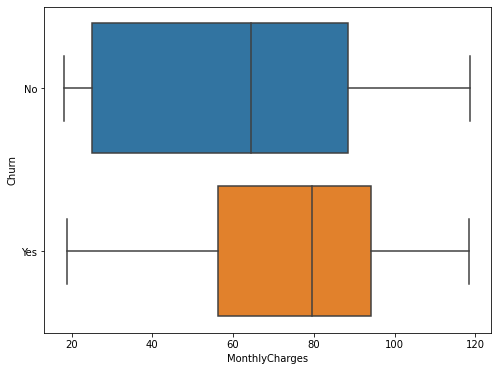

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(df['MonthlyCharges'],df['Churn'])
plt.show()

From the above plot we can see that,Customers who pays monthly charges between 50 to 100 are more likely to discontinue the service.

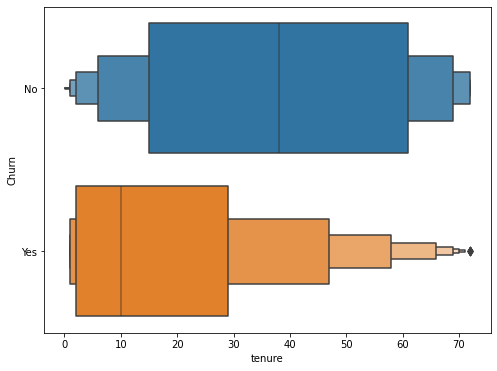

In [32]:
plt.figure(figsize=(8,6))
sns.boxenplot(df['tenure'],df['Churn'])
plt.show()

From the above plot we can see that, customers with less tenure months are more likely to leave the company.

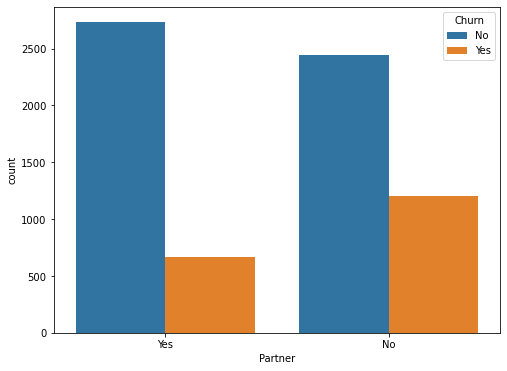

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(df['Partner'],hue=df['Churn'])
plt.show()

From the above plot we can observe that, customers who does not have partners are more likely to leave the company more.

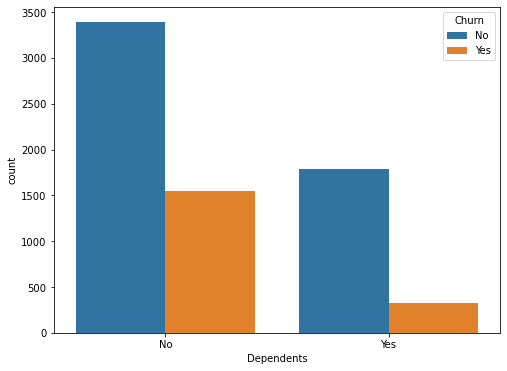

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(df['Dependents'],hue=df['Churn'])
plt.show()

From the above plot we can observe that, customers who does not have dependents are more likely to leave the company more.

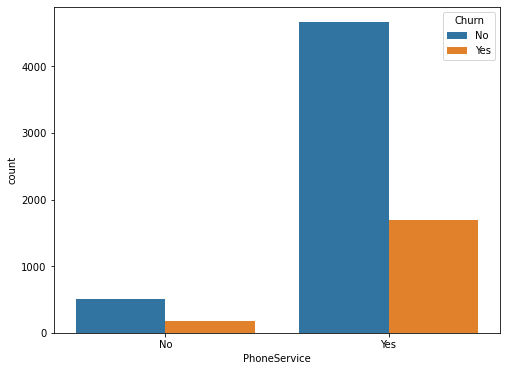

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(df['PhoneService'],hue=df['Churn'])
plt.show()

From the above plot we can observe that, customers who have phone services are more likely to leave the company more.

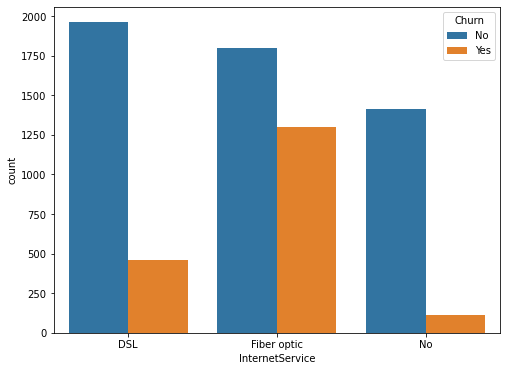

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(df['InternetService'],hue=df['Churn'])
plt.show()

From the above plot we can see that customer who use Fiber Optic internet services are most likely to leave the company.

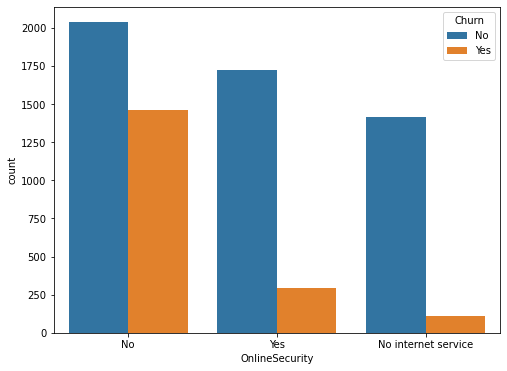

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(df['OnlineSecurity'],hue=df['Churn'])
plt.show()

From the above plot we can see that customer who does not subscribe to online security services are most likely to leave the company.

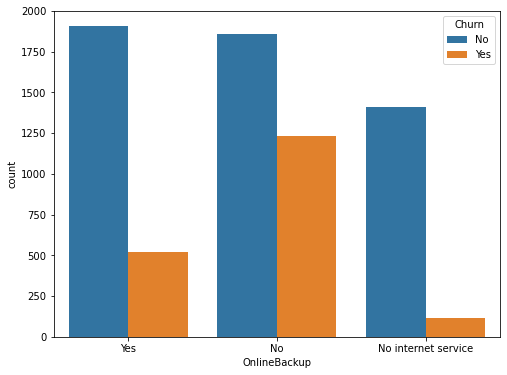

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(df['OnlineBackup'],hue=df['Churn'])
plt.show()

From the above plot we can see that customer who does not subscribe to online backup services are most likely to leave the company.

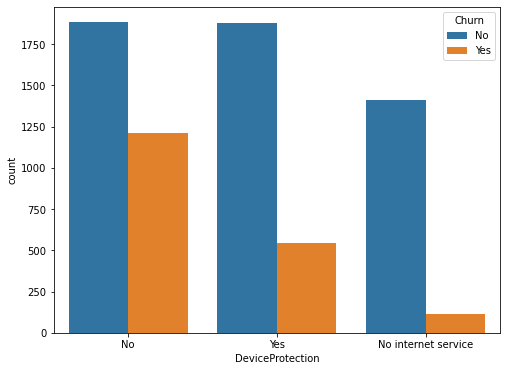

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(df['DeviceProtection'],hue=df['Churn'])
plt.show()

From the above plot we can see that customer who does not subscribe to DeviceProtection services are most likely to leave the company.

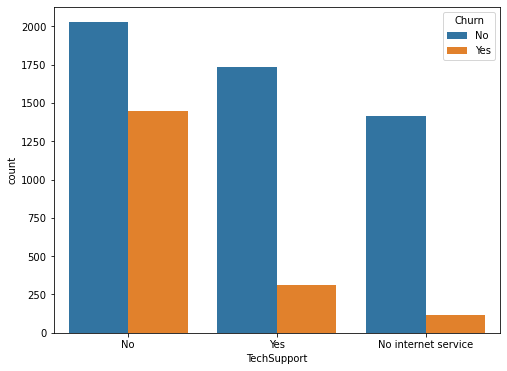

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(df['TechSupport'],hue=df['Churn'])
plt.show()

From the above plot we can see that customer who does not subscribe to additional tech support services are most likely to leave the company.

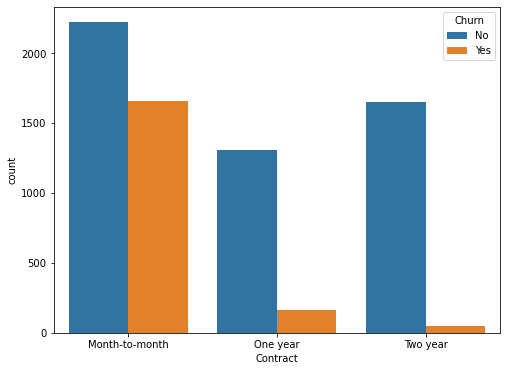

In [52]:
plt.figure(figsize=(8,6))
sns.countplot(df['Contract'],hue=df['Churn'])
plt.show()

From the above plot we can see that customer who subscribe with month to month contract services are most likely to leave the company.

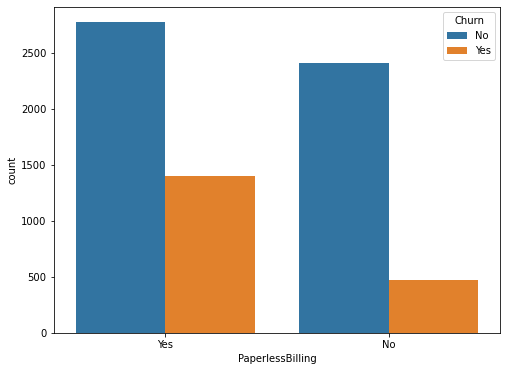

In [53]:
plt.figure(figsize=(8,6))
sns.countplot(df['PaperlessBilling'],hue=df['Churn'])
plt.show()

From the above plot we can see that customer who choose paper less billing options are most likely to leave the company.

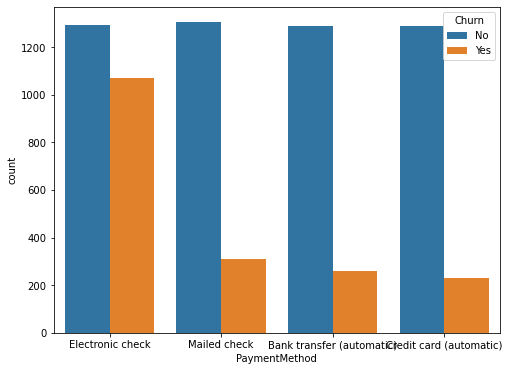

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(df['PaymentMethod'],hue=df['Churn'])
plt.show()

From the above plot we can see that customer who are using electronic check payment method are most likely to leave the company.

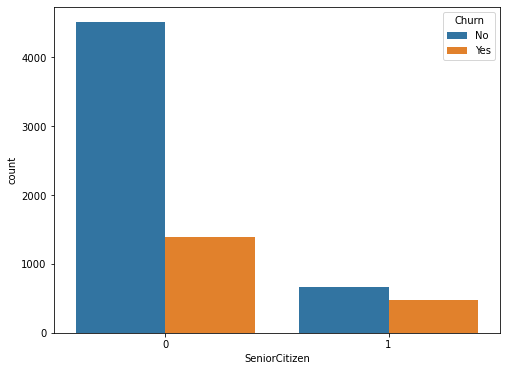

In [56]:
plt.figure(figsize=(8,6))
sns.countplot(df['SeniorCitizen'],hue=df['Churn'])
plt.show()

From the above plot we can see that customer who are not senior citizens are most likely to leave the company.

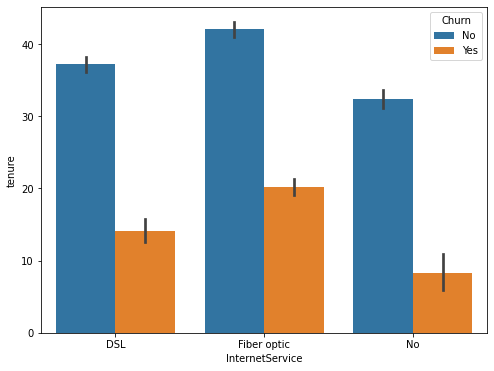

In [62]:
plt.figure(figsize=(8,6))
sns.barplot(df['InternetService'],df['tenure'],hue=df['Churn'])
plt.show()

From the above plot we can see that, we can observe that in all type of internet service connections, the customers who opt for less number of tenure months are more likely to leave the company.

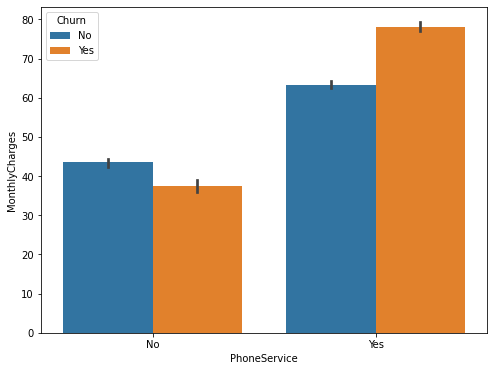

In [67]:
plt.figure(figsize=(8,6))
sns.barplot(df['PhoneService'],df['MonthlyCharges'],hue=df['Churn'])
plt.show()

From the above plot we can observe that, the customer who has phone service and pays more amount of monthly charges are most likely to leave the company.

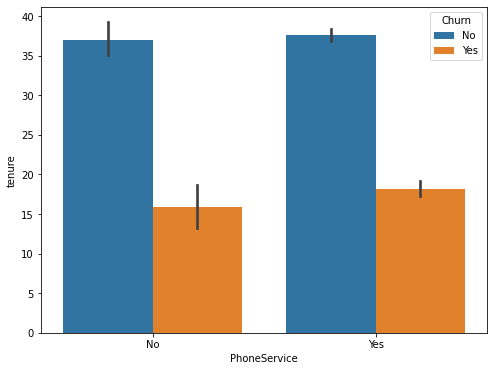

In [69]:
plt.figure(figsize=(8,6))
sns.barplot(df['PhoneService'],df['tenure'],hue=df['Churn'])
plt.show()

From the above plot we can see the customers who has less tenure periods are more likely to leave the company.

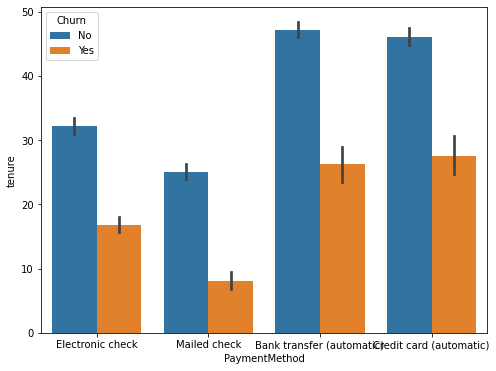

In [73]:
plt.figure(figsize=(8,6))
sns.barplot(df['PaymentMethod'],df['tenure'],hue=df['Churn'])
plt.show()

<Figure size 576x432 with 0 Axes>

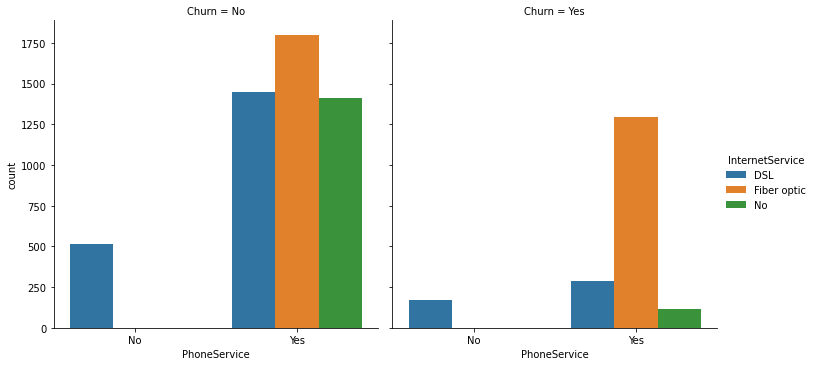

In [86]:
plt.figure(figsize=(8,6))
sns.catplot(x='PhoneService',hue='InternetService',col='Churn',data=df,kind='count')
plt.show()

From the above plot we can observe that customer who are having phone service and Fiber optic internet services are more likely to leave the company.

<Figure size 576x432 with 0 Axes>

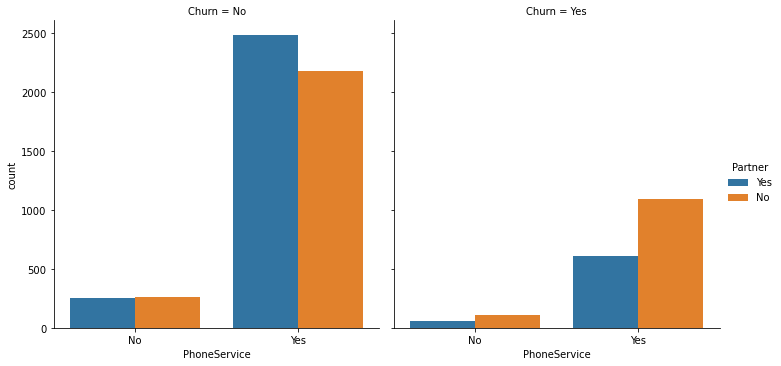

In [91]:
plt.figure(figsize=(8,6))
sns.catplot(x='PhoneService',hue='Partner',col='Churn',data=df,kind='count')
plt.show()

From the above plot we can see that, customers who has phone service and with no partners are more likely to leave the company.

<Figure size 576x432 with 0 Axes>

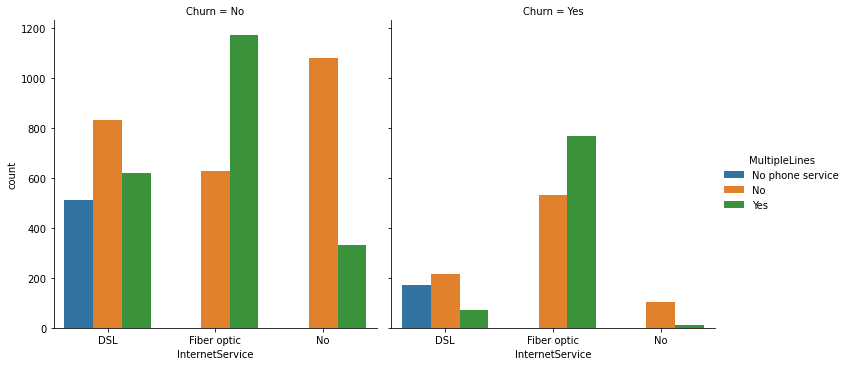

In [110]:
plt.figure(figsize=(8,6))
sns.catplot(x='InternetService',hue='MultipleLines',col='Churn',data=df,kind='count')
plt.show()

From the above plot we can see that customers who has fiber optic internet service and have subscription to multiple telephone lines are more likely to leave the company.

<Figure size 576x432 with 0 Axes>

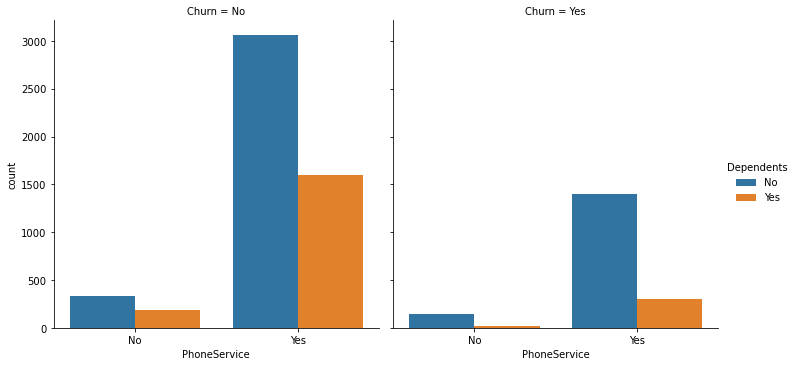

In [92]:
plt.figure(figsize=(8,6))
sns.catplot(x='PhoneService',hue='Dependents',col='Churn',data=df,kind='count')
plt.show()

From the above plot we can observe that customers who has phone connections and with no dependents are more likely to leave the company.

<Figure size 576x432 with 0 Axes>

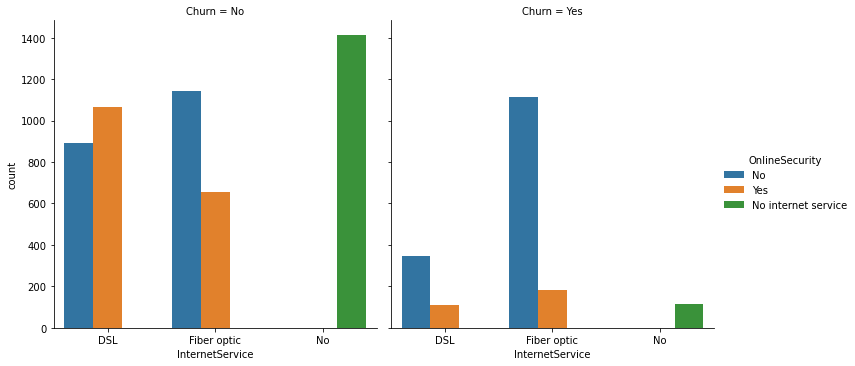

In [95]:
plt.figure(figsize=(8,6))
sns.catplot(x='InternetService',hue='OnlineSecurity',col='Churn',data=df,kind='count')
plt.show()

From the above plot we can see that customers with fiber optic internet services and no subscription to online security service are more likely to leave. 

<Figure size 576x432 with 0 Axes>

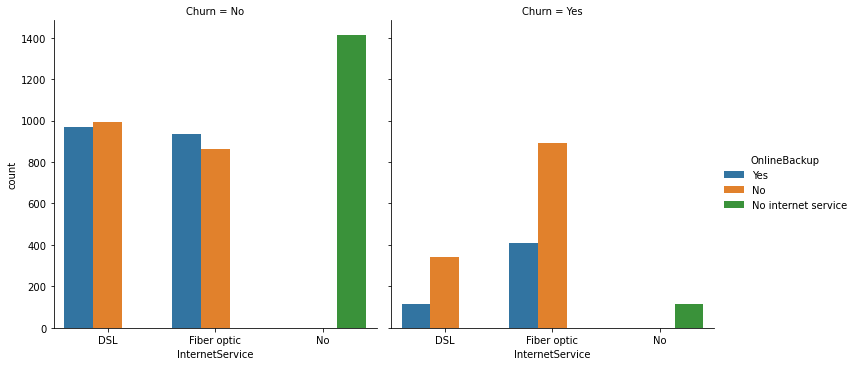

In [96]:
plt.figure(figsize=(8,6))
sns.catplot(x='InternetService',hue='OnlineBackup',col='Churn',data=df,kind='count')
plt.show()

Customers who are using FiberOptic Internet servie and no subscription to online backup are more likely to leave.

<Figure size 576x432 with 0 Axes>

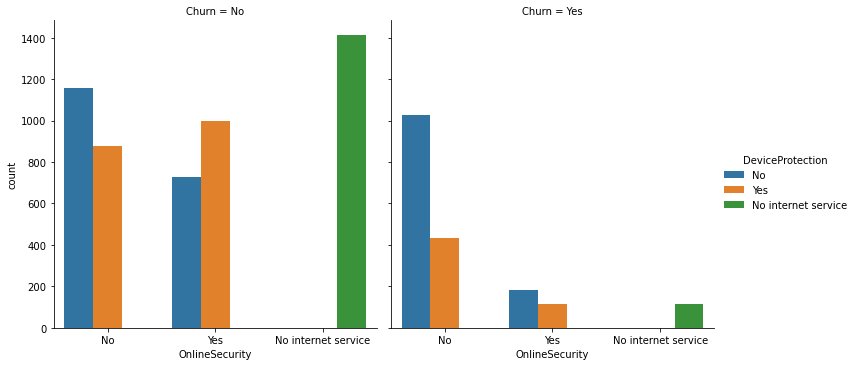

In [99]:
plt.figure(figsize=(8,6))
sns.catplot(x='OnlineSecurity',hue='DeviceProtection',col='Churn',data=df,kind='count')
plt.show()

Customers who has no subscription for  online security and Device protection are more likely to leave the company.

<Figure size 576x432 with 0 Axes>

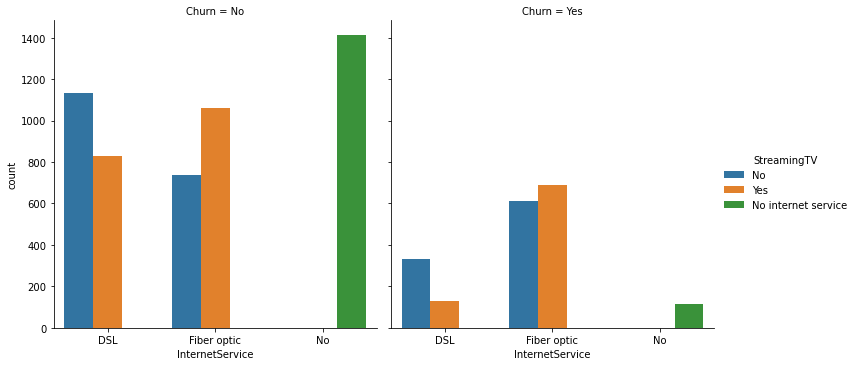

In [101]:
plt.figure(figsize=(8,6))
sns.catplot(x='InternetService',hue='StreamingTV',col='Churn',data=df,kind='count')
plt.show()

The customers who has fiber optic internet service and who watch Streaming TV are having the high churn rate.

<Figure size 576x432 with 0 Axes>

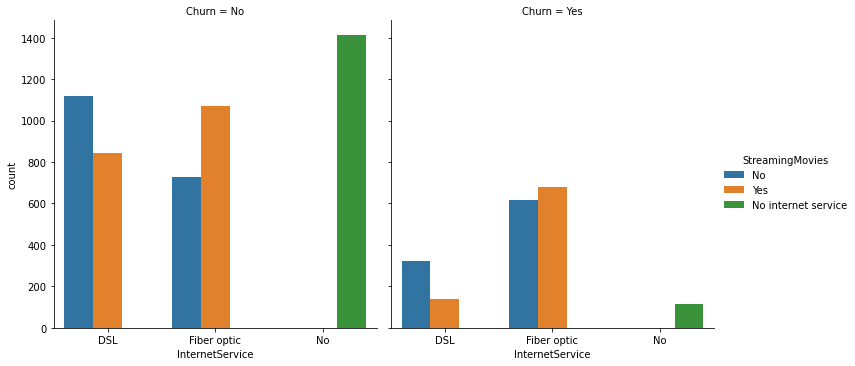

In [103]:
plt.figure(figsize=(8,6))
sns.catplot(x='InternetService',hue='StreamingMovies',col='Churn',data=df,kind='count')
plt.show()

The customers who has fiber optic internet service and who watch Streaming Movies are having the high churn rate.

<Figure size 576x432 with 0 Axes>

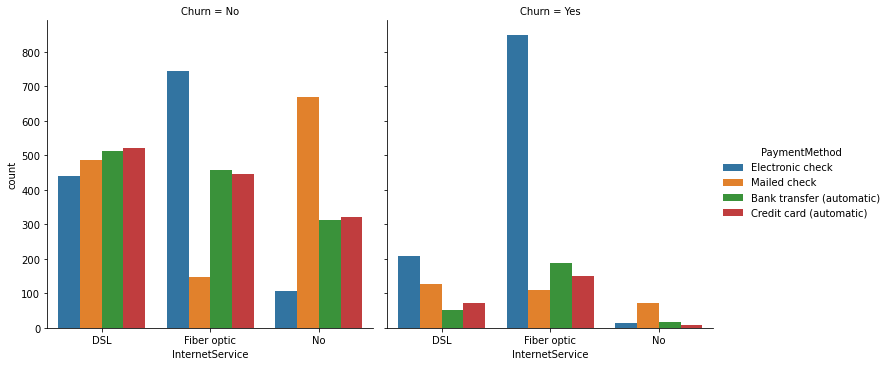

In [104]:
plt.figure(figsize=(8,6))
sns.catplot(x='InternetService',hue='PaymentMethod',col='Churn',data=df,kind='count')
plt.show()

From the above plot we can see customers who has fiber optic internet service and who pays electronic check payment has the high churn rate than other customers.

#### Multivariate Analysis

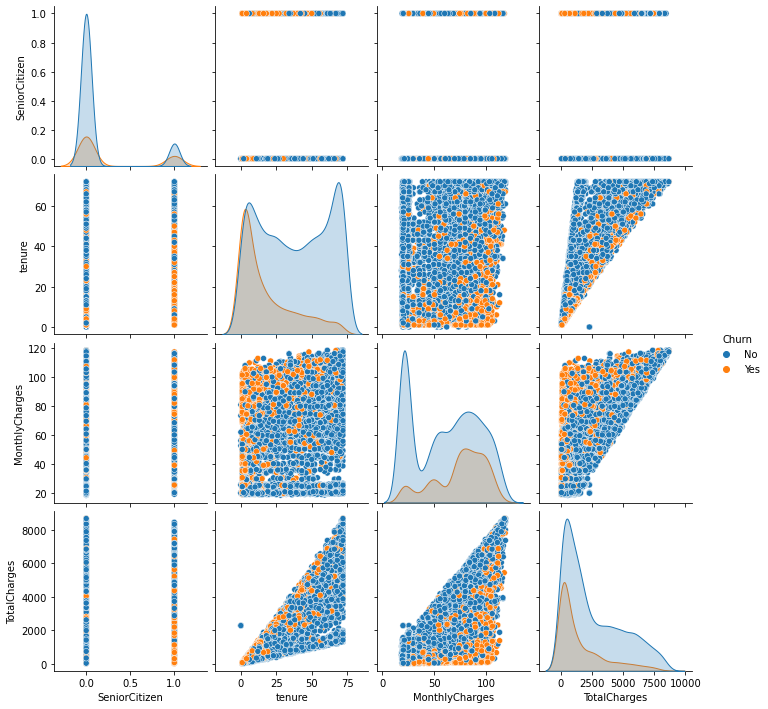

In [105]:
sns.pairplot(df,hue="Churn")

### Encoding the non-numeric features

In [111]:
enc_features=[]
for col in df.columns:
    if df[col].dtype=='object':
        enc_features.append(col)
enc_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
for col in enc_features:
    df[col]=LabelEncoder().fit_transform(df[col])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


### Checking MultiColinearity

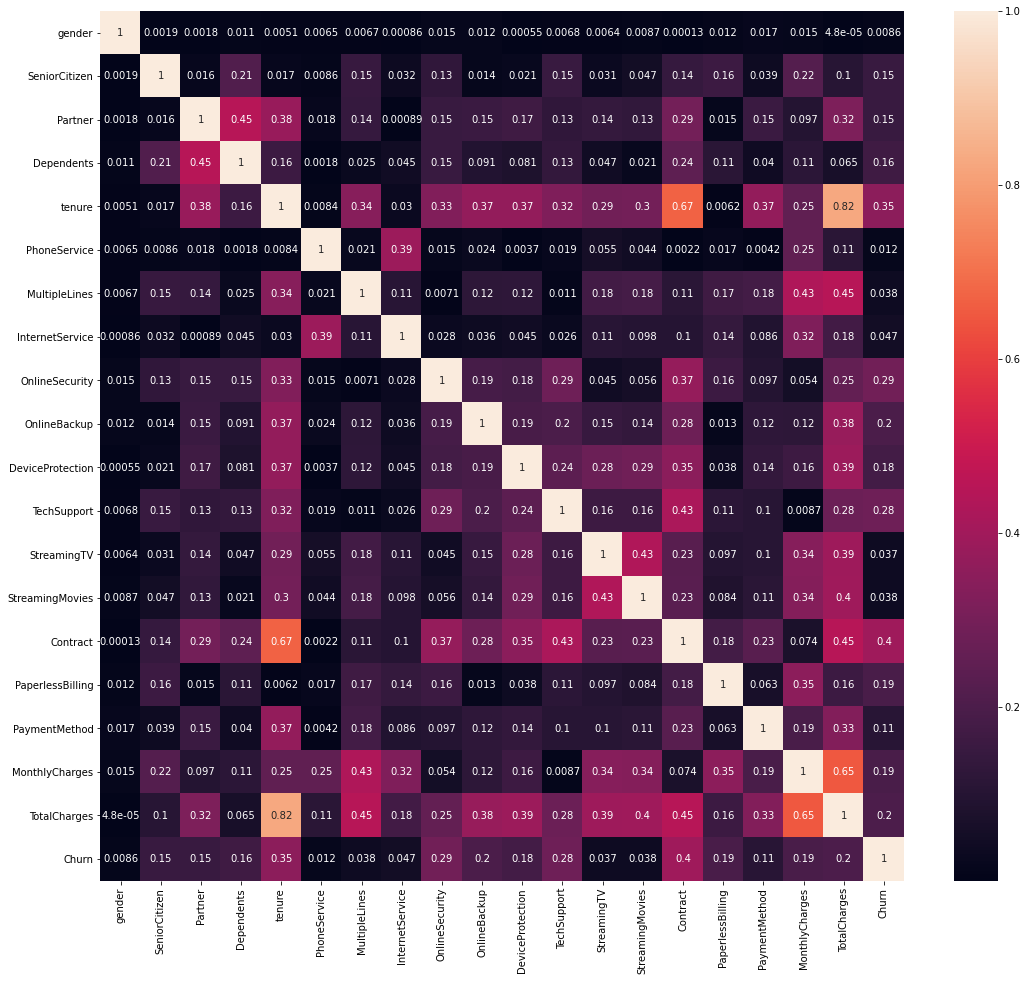

In [115]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr().abs(),annot=True)
plt.show()

1. From the above plot we can see that, there is no strong correlation between the features.
2. Tenure and total charges are 82% correlated with each other.
3. Monthly charges are 65% correlated with total charges.
4. Tenure and contract are 67% correlated with each other.

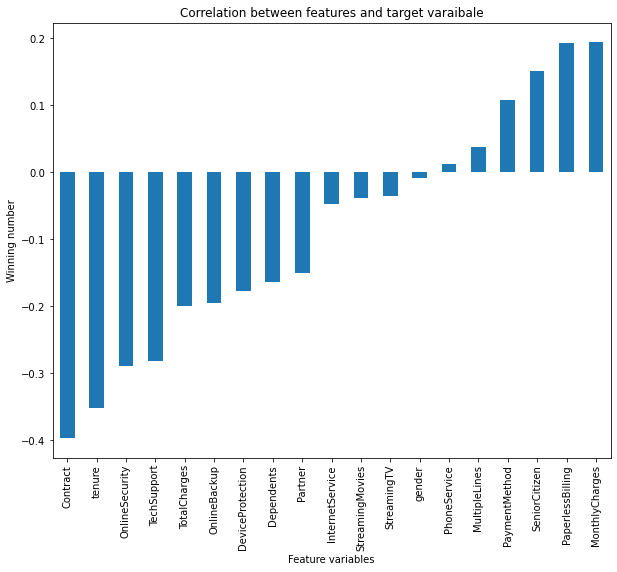

In [117]:
plt.figure(figsize=(10,8))
df.corr()['Churn'].sort_values().drop(['Churn']).plot(kind='bar')
plt.xlabel('Feature variables')
plt.ylabel('Winning number')
plt.xticks(rotation=90)
plt.title('Correlation between features and target varaibale')
plt.show()

From the above plot we can see that the feature gender has very less correlation with target variable churn.So, let's drop the feature gender.

In [146]:
df.drop(['gender'],axis=1,inplace=True)

### Outlier detection

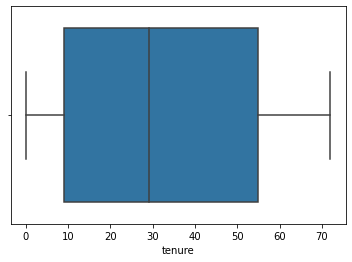

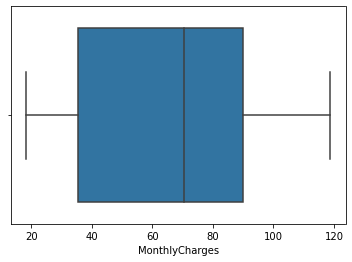

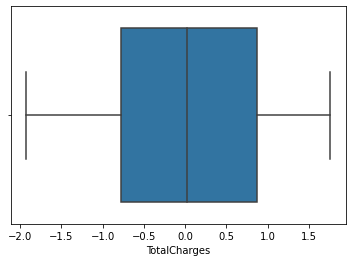

In [147]:
continous_features=['tenure','MonthlyCharges','TotalCharges']
for col in continous_features:
    sns.boxplot(df[col])
    plt.show()

We do not have outliers in our data set.

### Checking data skewness

In [148]:
df[continous_features].skew().sort_values()

MonthlyCharges   -0.220524
TotalCharges     -0.144899
tenure            0.239540
dtype: float64

We have skewness in the feature TotalCharges.Lets apply Powertransformer

In [149]:
from sklearn.preprocessing import PowerTransformer

In [150]:
df['TotalCharges']=PowerTransformer().fit_transform(df[['TotalCharges']])

In [151]:
df[continous_features].skew().sort_values()

MonthlyCharges   -0.220524
TotalCharges     -0.027676
tenure            0.239540
dtype: float64

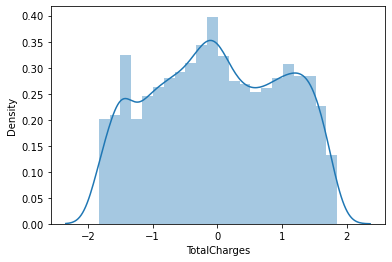

In [152]:
sns.distplot(df['TotalCharges'])
plt.show()

We removed skeness from the feature TotalCharges.

Lets split the fetaures and target variable.

In [153]:
X=df.drop(['Churn'],axis=1)
y=df['Churn']

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
X_sc=pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_sc.values,i) for i in range(len(X_sc.columns))]
vif['Features'] = X_sc.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
17,15.937376,TotalCharges
3,11.907102,tenure
16,5.246527,MonthlyCharges
13,2.514173,Contract
6,1.868750,InternetService
4,1.622390,PhoneService
1,1.462977,Partner
11,1.445116,StreamingTV
12,1.443539,StreamingMovies
5,1.398027,MultipleLines


We have multicolinearity problem in the dataset.Lets remove the feature TotalCharges as it has high VIF score.

In [157]:
X_sc=X_sc.drop(['TotalCharges'],axis=1)

In [158]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_sc.values,i) for i in range(len(X_sc.columns))]
vif['Features'] = X_sc.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
3,2.752907,tenure
16,2.732825,MonthlyCharges
13,2.459116,Contract
6,1.825819,InternetService
4,1.622282,PhoneService
1,1.460767,Partner
11,1.443670,StreamingTV
12,1.442252,StreamingMovies
5,1.391628,MultipleLines
2,1.381892,Dependents


Multicolineatity problem is remved now.Our data is ready to build the model.

In [172]:
X_sc=StandardScaler().fit_transform(X_sc)

## Model Building

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,plot_roc_curve
import xgboost as xgb

#####  Finding best random state to split train and test sets.

In [174]:
m_acc=0
b_rs=0
for i in range(1,200):
    lr=LogisticRegression()
    X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=i)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if(acc>m_acc):
        m_acc=acc
        b_rs=i
print("Accuracy: ",m_acc,"Best RS: ",b_rs)

Accuracy:  0.8245315161839863 Best RS:  139


##### Splitting the train test set using best Random state found

In [175]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.25,random_state=139)

##### Applying SMOTE balancing technique

As we have imbalanced data in out dataset, we will apply SMOTE resampling technique on our training data.

In [176]:
from imblearn.over_sampling import SMOTE

In [177]:
X_train_res,y_train_res=SMOTE().fit_resample(X_train,y_train)
print("Training set size before applying SMOTE: ",X_train.shape,y_train.shape)
print("Training set size after applying SMOTE:",X_train_res.shape,y_train_res.shape)

Training set size before applying SMOTE:  (5282, 17) (5282,)
Training set size after applying SMOTE: (7752, 17) (7752,)


### Building base models - Model selection

In [178]:
lr=LogisticRegression()
rf_clf=RandomForestClassifier()
gb_clf=GradientBoostingClassifier()
dt_clf=DecisionTreeClassifier()
ab_clf=AdaBoostClassifier()
knn_clf=KNeighborsClassifier()
svc=SVC()
xgb_clf=xgb.XGBClassifier()

In [179]:
models=[lr,rf_clf,gb_clf,dt_clf,ab_clf,knn_clf,svc,xgb_clf]

In [180]:
for m in models:
    m.fit(X_train_res,y_train_res)
    y_pred=m.predict(X_test)
    print("Metrics for ",m)
    print("Accuracy score: ",accuracy_score(y_test,y_pred))
    print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))
    print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
    print("Classsification Report: \n",classification_report(y_test,y_pred),'\n')

Metrics for  LogisticRegression()
Accuracy score:  0.7535491198182851
ROC AUC Score:  0.7570968128404888
Confusion Matrix: 
 [[973 325]
 [109 354]]
Classsification Report: 
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1298
           1       0.52      0.76      0.62       463

    accuracy                           0.75      1761
   macro avg       0.71      0.76      0.72      1761
weighted avg       0.80      0.75      0.77      1761
 

Metrics for  RandomForestClassifier()
Accuracy score:  0.7915956842703009
ROC AUC Score:  0.7273293020995917
Confusion Matrix: 
 [[1120  178]
 [ 189  274]]
Classsification Report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1298
           1       0.61      0.59      0.60       463

    accuracy                           0.79      1761
   macro avg       0.73      0.73      0.73      1761
weighted avg       0.79      0.79      0.79

#### Cross validation

In [181]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for m in models:
    print("For Model ",m)
    mean_acc=0
    for fold, (train_index, test_index) in enumerate(kf.split(X_sc,y), 1):
        X_train = X_sc[train_index]
        y_train = np.ravel(y)[train_index]
        X_test = X_sc[test_index]
        y_test = np.ravel(y)[test_index]
        sm = SMOTE(random_state=12)
        X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)       
        m.fit(X_train_oversampled, y_train_oversampled )  
        y_pred = m.predict(X_test)
        acc=accuracy_score(y_test,y_pred)
        mean_acc=mean_acc+acc
    print("Mean Accuracy: ",(mean_acc/5))

For Model  LogisticRegression()
Mean Accuracy:  0.7547915389702562
For Model  RandomForestClassifier()
Mean Accuracy:  0.7760898888637977
For Model  GradientBoostingClassifier()
Mean Accuracy:  0.7817695899735467
For Model  DecisionTreeClassifier()
Mean Accuracy:  0.7228457279501903
For Model  AdaBoostClassifier()
Mean Accuracy:  0.7694169785147429
For Model  KNeighborsClassifier()
Mean Accuracy:  0.6930287841151042
For Model  SVC()
Mean Accuracy:  0.7513833553777663
For Model  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, 

#### Plotting ROC AUC Curve for model selection

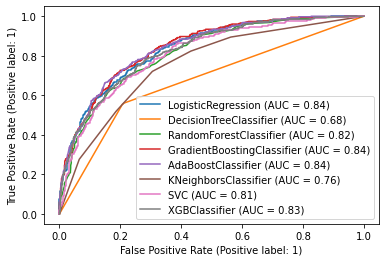

In [182]:
display=plot_roc_curve(lr,X_test,y_test)
plot_roc_curve(dt_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(rf_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(gb_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(ab_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(knn_clf,X_test,y_test,ax=display.ax_)
plot_roc_curve(svc,X_test,y_test,ax=display.ax_)
plot_roc_curve(xgb_clf,X_test,y_test,ax=display.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

##### Based on the Cross validation score and AUC score we can conclude GradientBoostingClassifier works fine for our dataset.

### Final model- GradientBoostingClassifier

##### Hyper Parameter tuning

In [183]:
from sklearn.model_selection import GridSearchCV

In [191]:
param={'learning_rate':[0.1,0.5,1],'max_depth':[9,11],
       'max_features':['auto', 'sqrt', 'log2']}
grd_srch=GridSearchCV(GradientBoostingClassifier(),param_grid=param,n_jobs=-1)
grd_srch.fit(X_train_res,y_train_res)
print(grd_srch.best_estimator_)
print(grd_srch.best_score_)

GradientBoostingClassifier(learning_rate=0.5, max_depth=11, max_features='log2')
0.8524435847840103


##### Finding best random state

In [193]:
m_acc=0
b_rs=0
for i in range(1,10):
    final_model=GradientBoostingClassifier(learning_rate=0.5, max_features='log2',max_depth=11,random_state=i)
    final_model.fit(X_train_res,y_train_res)
    y_pred=final_model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if(m_acc<acc):
        m_acc=acc
        b_rs=i
print("Best Accuracy: ",m_acc,"Best RS: ",b_rs)
final_model=GradientBoostingClassifier(learning_rate=0.5, max_features='log2',max_depth=11,random_state=b_rs)
final_model.fit(X_train_res,y_train_res)
y_pred=final_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best Accuracy:  0.9460227272727273 Best RS:  2
0.9460227272727273
0.9315175097276265
[[990  38]
 [ 38 342]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1028
           1       0.90      0.90      0.90       380

    accuracy                           0.95      1408
   macro avg       0.93      0.93      0.93      1408
weighted avg       0.95      0.95      0.95      1408



In [194]:
final_model=GradientBoostingClassifier(learning_rate=0.5,max_depth=11, max_features='log2',random_state=2)
final_model.fit(X_train_res,y_train_res)
y_pred=final_model.predict(X_test)
print("Test Accuracy score: " ,accuracy_score(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classifiction Report:\n",classification_report(y_test,y_pred))

Test Accuracy score:  0.9460227272727273
ROC AUC Score:  0.9315175097276265
Confusion Matrix: 
 [[990  38]
 [ 38 342]]
Classifiction Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1028
           1       0.90      0.90      0.90       380

    accuracy                           0.95      1408
   macro avg       0.93      0.93      0.93      1408
weighted avg       0.95      0.95      0.95      1408



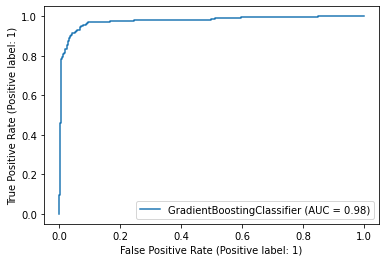

In [195]:
plot_roc_curve(final_model,X_test,y_test)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

##### Our final model able to cover 98% of AUC score with 95% of test accuracy score.

### Model Saving

In [196]:
import pickle

In [197]:
pickle.dump(final_model,open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/CustomerChurnPrediction.pkl','wb'))

In [198]:
final_model=pickle.load(open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/CustomerChurnPrediction.pkl','rb'))

In [201]:
prediction=final_model.predict(X_test)
result_table=pd.DataFrame({'Actual':y_test,'Predicted':prediction})
result_table

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
1403,0,0
1404,0,1
1405,0,0
1406,1,1
